In [ ]:
'''
– A dashboard interface was built using Jupyter Notebook features and libraries which displayed the CNN-based pre-
diction model used to classify brain tumor images based on glioma, meningioma, and pituitary tumor conditions.
– The model was tested on various brain tumor image datasets containing T1- weighted contrast-enhanced brain MRI
images of each tumor condition.
'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/mental/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
'''
file = open("D:./AMITY/NTCC-2 (2022)/mri2.jpg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=1450,
    height=100,
)
'''

'\nfile = open("D:./AMITY/NTCC-2 (2022)/mri2.jpg", "rb")\nimage = file.read()\nwidgets.Image(\n    value=image,\n    format=\'png\',\n    width=1450,\n    height=100,\n)\n'

In [3]:
html = "<h1 style='font-size:40px'> MCD </h1>"
widgets.HTML(value=html)

HTML(value="<h1 style='font-size:40px'> MCD </h1>")

In [4]:
from ipywidgets import Layout
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

file1 = open("D:./AMITY/NTCC-2 (2022)/normal.jpeg", "rb")
image1 = file1.read()
w1=widgets.Image(
    value=image1,
    format='jpg',
    width=300,
    height=300,
)

file2 = open("D:./AMITY/NTCC-2 (2022)/glioma.jpg", "rb")
image2 = file2.read()
w2=widgets.Image(
    value=image2,
    format='jpg',
    width=300,
    height=300,
)


file3 = open("D:./AMITY/NTCC-2 (2022)/menin.jpg", "rb")
image3 = file3.read()
w3=widgets.Image(
    value=image3,
    format='jpg',
    width=300,
    height=300,
)

file4 = open("D:./AMITY/NTCC-2 (2022)/pit.jpg", "rb")
image4 = file4.read()
w4=widgets.Image(
    value=image4,
    format='jpg',
    width=300,
    height=300,
)

def f(Select):
    return Select

interact(f,Select=[('none','Option not selected'),('no_tumor', w1), ('glioma_tumor', w2),('meningioma_tumor', w3),('pituitary_tumor', w4)]);

interactive(children=(Dropdown(description='Select', options=(('none', 'Option not selected'), ('no_tumor', Im…

In [5]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

#sns.palplot(colors_dark)
#sns.palplot(colors_green)
#sns.palplot(colors_red)

In [6]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [7]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('C:/Users/AJAY KUMAR/Downloads/archive (2)','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/AJAY KUMAR/Downloads/archive (2)','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.69it/s]


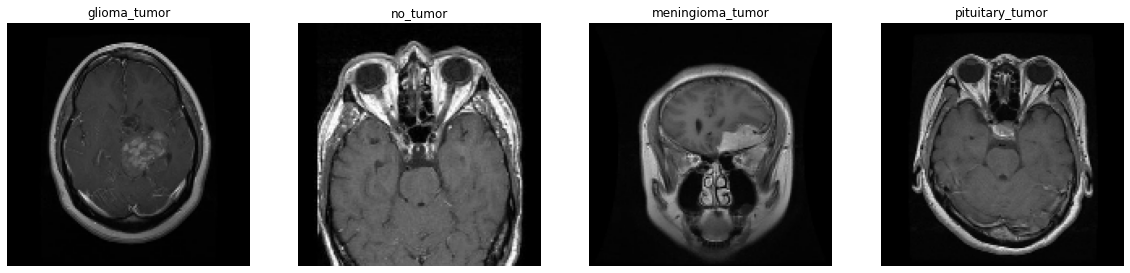

In [8]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
#fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
#             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [9]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [10]:
X_train.shape

(3264, 150, 150, 3)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [14]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [15]:
#model.summary()

In [16]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [17]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [18]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.8229
Epoch 1: val_accuracy improved from -inf to 0.85714, saving model to effnet.h5
83/83 [==============================] - 311s 4s/step - loss: 0.4911 - accuracy: 0.8229 - val_loss: 0.6752 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9391
Epoch 2: val_accuracy improved from 0.85714 to 0.93878, saving model to effnet.h5
83/83 [==============================] - 315s 4s/step - loss: 0.1924 - accuracy: 0.9391 - val_loss: 0.1834 - val_accuracy: 0.9388 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9569
Epoch 3: val_accuracy did not improve from 0.93878
83/83 [==============================] - 305s 4s/step - loss: 0.1229 - accuracy: 0.9569 - val_loss: 0.4303 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 4/12
83/83 [==============================] - ETA: 0s - loss: 0.1169 - 

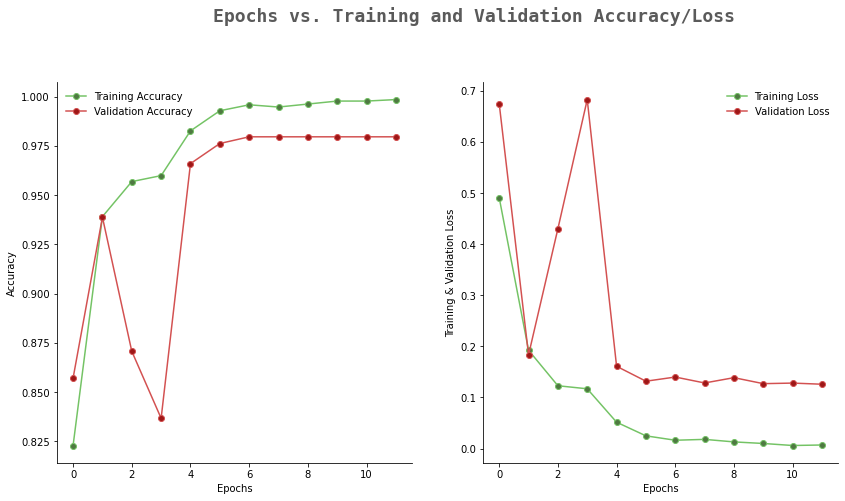

In [19]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 10s 724ms/step


In [21]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       1.00      0.98      0.99        51
           2       0.98      0.99      0.98        96
           3       0.98      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.99      0.98      0.99       327
weighted avg       0.98      0.98      0.98       327



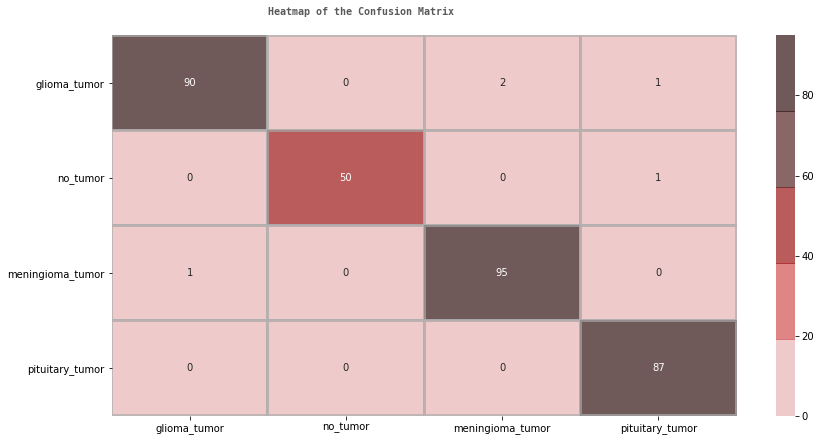

In [22]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_red[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=10,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [23]:
from ipywidgets import *

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [24]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
 #   with out:
  #      print("Hi")
   #     clear_output()
        try:
            img_pred(uploader)
            print("Hi")
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])